# KAGGLE TITANIC DATASET

This notebook aims to build a model which predicts whether a passenger survived the Titanic disaster or not

Importing necessary libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [3]:
data.shape

(891, 12)

There are 891 entries in the training data. And there are 11 features.

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Features Age, Cabin and Embarked has null values

Analyzing each feature...

In [6]:
print(data['PassengerId'].value_counts())
print()
print(data['Name'].value_counts())
print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64



Features PassengerId and Names has 891 unique values.

In [7]:
print(data['Pclass'].value_counts())
print()
print(data['Sex'].value_counts())
print()
print(data['Age'].value_counts())
print()
print(data['SibSp'].value_counts())
print()
print(data['Parch'].value_counts())
print()
print(data['Ticket'].value_counts())
print()
print(data['Fare'].value_counts())
print()
print(data['Cabin'].value_counts())
print()
print(data['Embarked'].value_counts())
print()

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E3

From the above output we get that
1. Features Pclass, Sex and Embarked are categorical features
2. Features Fare, Parch, SibSp and Age are numerical features

Features PassengerId, Name, Ticket and Cabin does not seem to hold much value.

Plotting Categorical Variables

<AxesSubplot:xlabel='Pclass'>

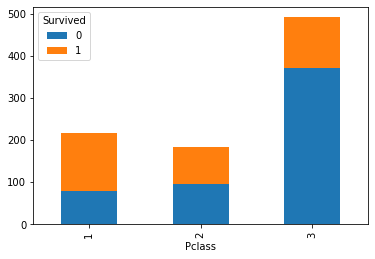

In [8]:
data.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Survived', index='Pclass', values=0).plot.bar(stacked='True')

First class passengers has higher survival rate, while third class passengers has very low survival rate.

<AxesSubplot:xlabel='Sex'>

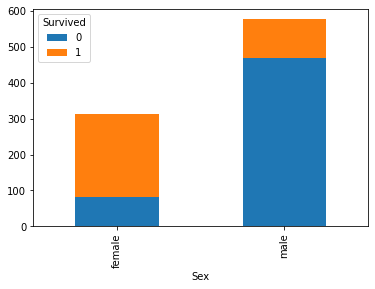

In [9]:
data.groupby(['Sex', 'Survived']).size().reset_index().pivot(columns='Survived', index='Sex', values=0).plot.bar(stacked='True')

Majority of male passengers dndn't survive while majority of female passengers survived.

<AxesSubplot:xlabel='Embarked'>

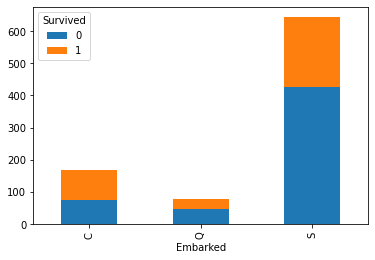

In [10]:
data.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Survived', index='Embarked', values=0).plot.bar(stacked=True)

Passengers embarked from Southampton and Queenstown had lower chances of surviving while those embarked from Cherbourg had slightly higher chances of survival.

Analyzing numerical features

<AxesSubplot:>

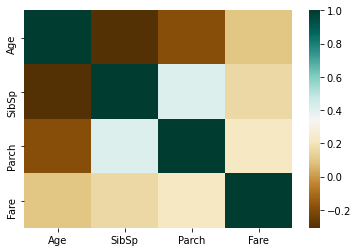

In [11]:
sns.heatmap(data[['Age', 'SibSp', 'Parch', 'Fare']].corr(), cmap='BrBG')

There is high correlation between SibSp and Parch. Siblings, spouses and parents tend to travel together

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

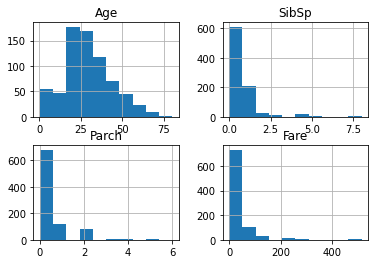

In [12]:
data.hist(column=['Age', 'SibSp', 'Parch', 'Fare'])

<AxesSubplot:>

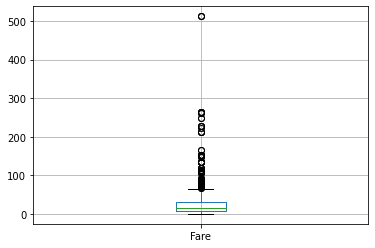

In [13]:
data[['Fare']].boxplot()

<AxesSubplot:>

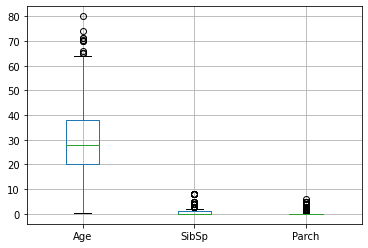

In [14]:
data[['Age', 'SibSp', 'Parch']].boxplot()

All numerical features have a fair amount of outliers.

Removing the 2 rows with null values in column Embarked

In [15]:
data = data[data['Embarked'].notna()]

## Train-Test split and Transformers



In [16]:
train_data_with_age = data[data['Age'].notna()]
train_data_without_age = data[data['Age'].isna()]

drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_columns = ['Pclass', 'Sex', 'Embarked']

Building estimator pipeline for data with Age

In [17]:
X = train_data_with_age.drop(columns='Survived')
y = train_data_with_age['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=3)

In [18]:
transformer_with_age = ColumnTransformer([
    ('drop_columns', 'drop', drop_columns),
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(), categorical_columns)
])

from sklearn.linear_model import LogisticRegression

pipe_est_with_age = Pipeline([
    ('transform', transformer_with_age),
    ('clf', LogisticRegression())
])

pipe_est_with_age.fit(X_train, y_train)

print('Train score: ', pipe_est_with_age.score(X_train, y_train))
print('Test score: ', pipe_est_with_age.score(X_test, y_test))

Train score:  0.7953125
Test score:  0.8472222222222222


*Hyperparameter Tuning*

In [19]:
param_grid = {
    'clf__C' : [0.01, 0.1, 1, 10],
    'clf__solver' : ['liblinear', 'sag']
}

gscv_with_age = GridSearchCV(pipe_est_with_age, param_grid,
                             scoring='accuracy', cv=5,
                             return_train_score=True)
gscv_with_age.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['PassengerId',
                                                                          'Name',
                                                                          'Ticket',
                                                                          'Cabin']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',


In [20]:
gscv_with_age.best_params_

{'clf__C': 0.1, 'clf__solver': 'liblinear'}

In [21]:
print('Train score: ', gscv_with_age.best_estimator_.score(X_train, y_train))
print('Test score: ', gscv_with_age.best_estimator_.score(X_test, y_test))

Train score:  0.7984375
Test score:  0.8472222222222222


Building estimator for data without age

In [22]:
X = train_data_without_age.drop(columns='Survived')
y = train_data_without_age['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=3)

In [23]:
drop_columns_age = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']
numerical_columns_without_age = ['SibSp', 'Parch', 'Fare']

transformer_without_age = ColumnTransformer([
    ('drop_columns', 'drop', drop_columns_age),
    ('num', StandardScaler(), numerical_columns_without_age),
    ('cat', OneHotEncoder(), categorical_columns)
])

from sklearn.linear_model import LogisticRegression

pipe_est_without_age = Pipeline([
    ('transform', transformer_without_age),
    ('clf', LogisticRegression())
])

pipe_est_without_age.fit(X_train, y_train)

print('Train score: ', pipe_est_without_age.score(X_train, y_train))
print('Test score: ', pipe_est_without_age.score(X_test, y_test))

Train score:  0.8616352201257862
Test score:  0.7777777777777778


In [27]:
gscv_without_age = GridSearchCV(pipe_est_without_age, param_grid,
                             scoring='accuracy', cv=10,
                             return_train_score=True)
gscv_without_age.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['PassengerId',
                                                                          'Name',
                                                                          'Ticket',
                                                                          'Cabin',
                                                                          'Age']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['SibSp',
                                                                          'Parch',

In [28]:
gscv_without_age.best_params_

{'clf__C': 0.1, 'clf__solver': 'sag'}

In [29]:
print('Train score: ', gscv_without_age.best_estimator_.score(X_train, y_train))
print('Test score: ', gscv_without_age.best_estimator_.score(X_test, y_test))

Train score:  0.8553459119496856
Test score:  0.8333333333333334
